## Import Libraries

In [168]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [169]:
import datetime
import calendar
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import warnings
from scipy import stats

%matplotlib inline

## Load the Dataset

In [170]:
train = pd.read_csv('train_2017.csv')
properties_2017 = pd.read_csv('properties_2017.csv')

C:\Users\Jones\AppData\Local\Temp\ipykernel_21892\1359773743.py:2: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  properties_2017 = pd.read_csv('properties_2017.csv')


## Basic EDA

In [171]:
train.head()

,parcelid,logerror,transactiondate
0,14297519,0.025595,2017-01-01
1,17052889,0.055619,2017-01-01
2,14186244,0.005383,2017-01-01
3,12177905,-0.103410,2017-01-01
4,10887214,0.006940,2017-01-01


In [172]:
properties_2017.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


In [173]:
train.shape

(77613, 3)

In [174]:
properties_2017.shape

(2985217, 58)

In [175]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77613 entries, 0 to 77612
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   parcelid         77613 non-null  int64  
 1   logerror         77613 non-null  float64
 2   transactiondate  77613 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.8+ MB


In [176]:
properties_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   parcelid                      int64  
 1   airconditioningtypeid         float64
 2   architecturalstyletypeid      float64
 3   basementsqft                  float64
 4   bathroomcnt                   float64
 5   bedroomcnt                    float64
 6   buildingclasstypeid           float64
 7   buildingqualitytypeid         float64
 8   calculatedbathnbr             float64
 9   decktypeid                    float64
 10  finishedfloor1squarefeet      float64
 11  calculatedfinishedsquarefeet  float64
 12  finishedsquarefeet12          float64
 13  finishedsquarefeet13          float64
 14  finishedsquarefeet15          float64
 15  finishedsquarefeet50          float64
 16  finishedsquarefeet6           float64
 17  fips                          float64
 18  fireplacecnt          

## Merging the dataset based on the parcelid

In [177]:
#merging the two datasets
df = pd.merge(train, properties_2017, on='parcelid', how='left')
df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,14297519,0.025595,2017-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13
1,17052889,0.055619,2017-01-01,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13
2,14186244,0.005383,2017-01-01,NaN,NaN,NaN,2.0,3.0,NaN,NaN,...,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13
3,12177905,-0.103410,2017-01-01,NaN,NaN,NaN,3.0,4.0,NaN,8.0,...,NaN,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13
4,10887214,0.006940,2017-01-01,1.0,NaN,NaN,3.0,3.0,NaN,8.0,...,NaN,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,NaN,NaN,6.037124e+13


In [178]:
df.shape

(77613, 60)

## Data Cleaning

<AxesSubplot: >

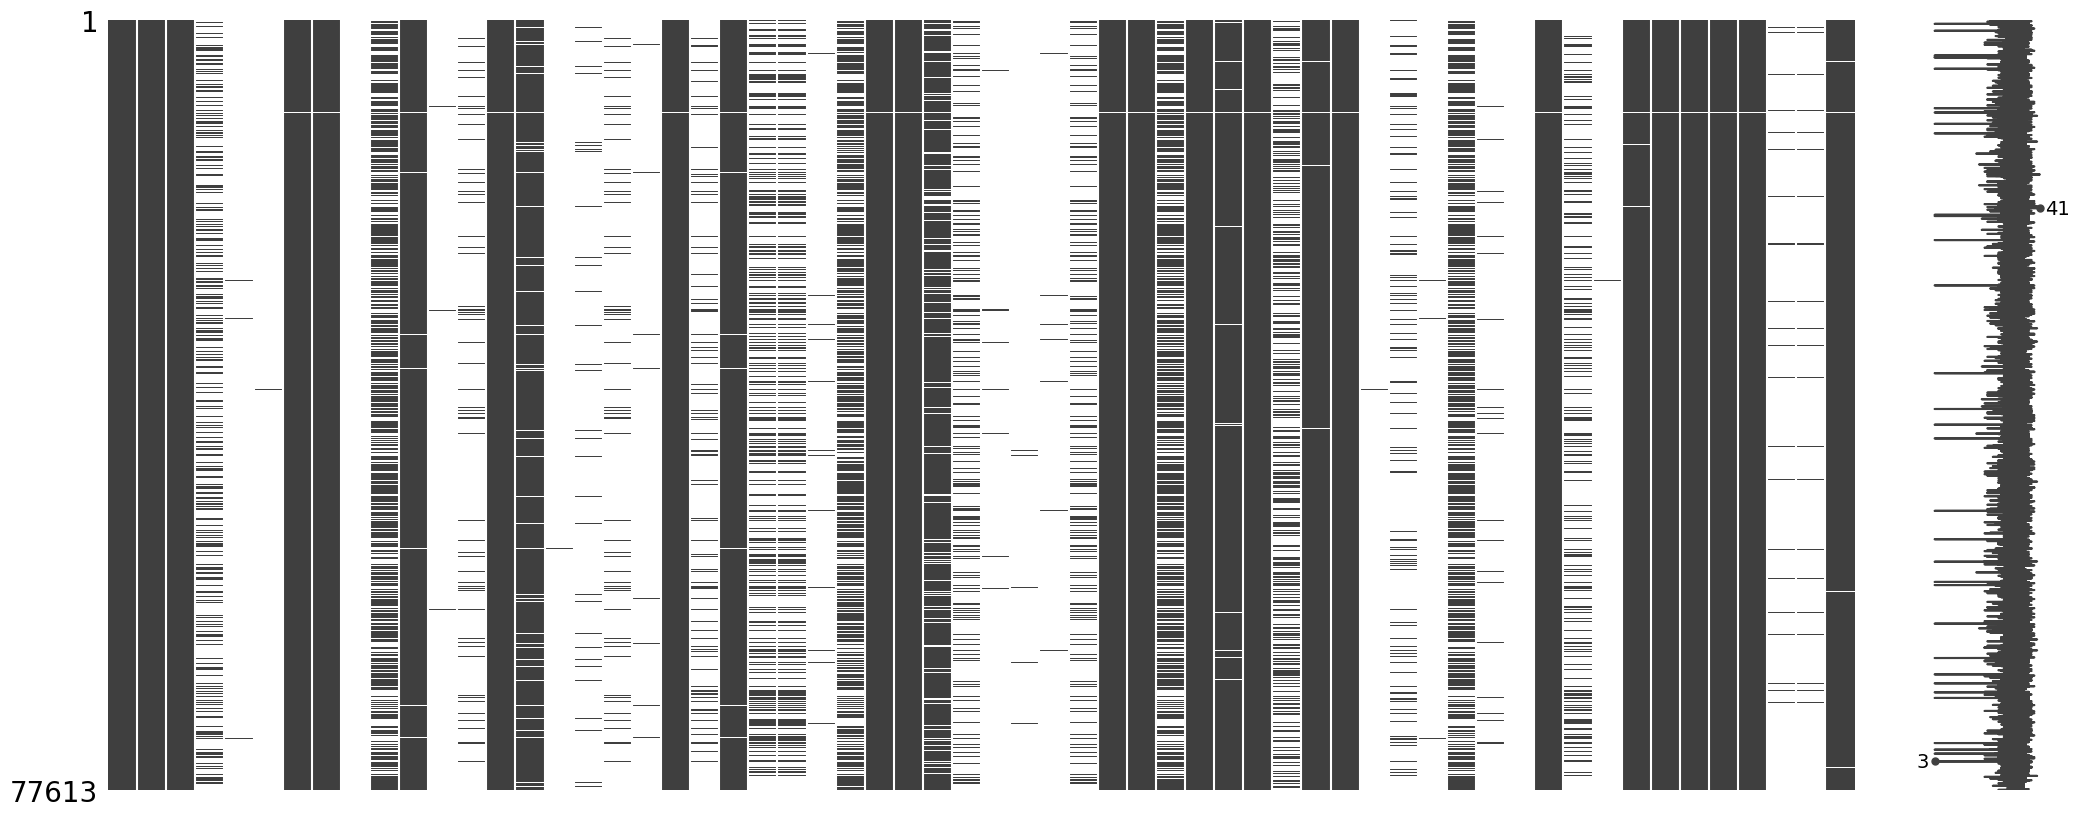

In [179]:
#missing values
msno.matrix(df)

In [180]:
df.isnull().sum()

parcelid                            0
logerror                            0
transactiondate                     0
airconditioningtypeid           52606
architecturalstyletypeid        77406
basementsqft                    77563
bathroomcnt                        34
bedroomcnt                         34
buildingclasstypeid             77598
buildingqualitytypeid           27804
calculatedbathnbr                 650
decktypeid                      76999
finishedfloor1squarefeet        71576
calculatedfinishedsquarefeet      235
finishedsquarefeet12             3690
finishedsquarefeet13            77571
finishedsquarefeet15            74586
finishedsquarefeet50            71576
finishedsquarefeet6             77227
fips                               34
fireplacecnt                    69324
fullbathcnt                       650
garagecarcnt                    52093
garagetotalsqft                 52093
hashottuborspa                  76074
heatingorsystemtypeid           28042
latitude    

In [181]:
#missing value percentage
missing_percent = df.isnull().sum() / len(df) * 100
missing_percent.sort_values(inplace=True)
missing_percent

parcelid                         0.000000
logerror                         0.000000
transactiondate                  0.000000
longitude                        0.043807
propertycountylandusecode        0.043807
propertylandusetypeid            0.043807
rawcensustractandblock           0.043807
regionidcounty                   0.043807
roomcnt                          0.043807
fips                             0.043807
bedroomcnt                       0.043807
bathroomcnt                      0.043807
assessmentyear                   0.043807
latitude                         0.043807
taxvaluedollarcnt                0.045096
landtaxvaluedollarcnt            0.046384
taxamount                        0.050249
regionidzip                      0.108229
structuretaxvaluedollarcnt       0.191978
calculatedfinishedsquarefeet     0.302784
censustractandblock              0.362053
yearbuilt                        0.391687
fullbathcnt                      0.837489
calculatedbathnbr                0

Looking at the missing values in the different columns we will choose to either place a 0 in the values remove the rows and so on.

In [182]:
#place 0 in the missing values of the fireplacecnt column
df['fireplacecnt'].fillna(0, inplace=True)

In [183]:
# Identify columns that have more than 80% missing values
columns_to_drop = missing_percent[missing_percent > 80].index

# Drop these columns from the DataFrame
df = df.drop(columns=columns_to_drop)

df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,roomcnt,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,14297519,0.025595,2017-01-01,NaN,3.5,4.0,NaN,3.5,3100.0,3100.0,...,0.0,NaN,1998.0,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13
1,17052889,0.055619,2017-01-01,NaN,1.0,2.0,NaN,1.0,1465.0,1465.0,...,5.0,NaN,1967.0,1.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13
2,14186244,0.005383,2017-01-01,NaN,2.0,3.0,NaN,2.0,1243.0,1243.0,...,6.0,NaN,1962.0,1.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13
3,12177905,-0.103410,2017-01-01,NaN,3.0,4.0,8.0,3.0,2376.0,2376.0,...,0.0,1.0,1970.0,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13
4,10887214,0.006940,2017-01-01,1.0,3.0,3.0,8.0,3.0,1312.0,1312.0,...,0.0,1.0,1964.0,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,6.037124e+13


In [184]:
#missing value percentage
missing_percent = df.isnull().sum() / len(df) * 100
missing_percent.sort_values(inplace=True)
missing_percent

parcelid                         0.000000
logerror                         0.000000
transactiondate                  0.000000
propertylandusetypeid            0.043807
longitude                        0.043807
latitude                         0.043807
rawcensustractandblock           0.043807
regionidcounty                   0.043807
roomcnt                          0.043807
fips                             0.043807
propertycountylandusecode        0.043807
assessmentyear                   0.043807
bedroomcnt                       0.043807
bathroomcnt                      0.043807
taxvaluedollarcnt                0.045096
landtaxvaluedollarcnt            0.046384
taxamount                        0.050249
regionidzip                      0.108229
structuretaxvaluedollarcnt       0.191978
calculatedfinishedsquarefeet     0.302784
censustractandblock              0.362053
yearbuilt                        0.391687
fullbathcnt                      0.837489
calculatedbathnbr                0

In [185]:
#place 1 in the missing values of the numberofstories column
df['numberofstories'].fillna(1, inplace=True)


In [186]:
#place 0 in the missing values of the garagecarcnt, structuretaxvaluedollarcnt, fullbathcnt, calculatedbathnbr, finishedsquarefeet12, lotsizesquarefeet, unitcnt, propertyzoningdesc,buildingqualitytypeid, heatingorsystemtypeid, garagetotalsqft, garagecarcnt, poolcnt, regionidcity, landtaxvaluedollarcnt column
df['garagecarcnt'].fillna(0, inplace=True)
df['structuretaxvaluedollarcnt'].fillna(0, inplace=True)
df['fullbathcnt'].fillna(0, inplace=True)
df['calculatedbathnbr'].fillna(0, inplace=True)
df['finishedsquarefeet12'].fillna(0, inplace=True)
df['lotsizesquarefeet'].fillna(0, inplace=True)
df['unitcnt'].fillna(0, inplace=True)
df['propertyzoningdesc'].fillna(0, inplace=True)
df['buildingqualitytypeid'].fillna(0, inplace=True)
df['heatingorsystemtypeid'].fillna(0, inplace=True)
df['garagetotalsqft'].fillna(0, inplace=True)
df['garagecarcnt'].fillna(0, inplace=True)
df['poolcnt'].fillna(0, inplace=True)
df['regionidcity'].fillna(0, inplace=True)
df['landtaxvaluedollarcnt'].fillna(0, inplace=True)

In [187]:
# remove the rows which have missing values in roomcnt, fips, regionidzip, fips, yearbuilt
df = df.dropna(subset=['roomcnt', 'fips', 'regionidzip', 'fips', 'yearbuilt'])

In [188]:
# put mean of the column in missing values of the column taxvaluedollarcnt, calculatedfinishedsquarefeet
df['taxvaluedollarcnt'].fillna(df['taxvaluedollarcnt'].mean(), inplace=True)
df['calculatedfinishedsquarefeet'].fillna(df['calculatedfinishedsquarefeet'].mean(), inplace=True)


In [189]:
#put median of the column in missing values of the column taxmount
df['taxamount'].fillna(df['taxamount'].median(), inplace=True)

In [190]:
#remove columns censustractandblock, parcelid, regionidneighborhood, airconditioningtypeid, assessmentyear
df = df.drop(columns=['censustractandblock', 'parcelid', 'regionidneighborhood', 'airconditioningtypeid', 'assessmentyear'])

C:\Users\Jones\AppData\Local\Temp\ipykernel_21892\2170199282.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Correlation Matrix:
                              logerror  bathroomcnt  bedroomcnt  \
logerror                      1.000000     0.027720    0.034089   
bathroomcnt                   0.027720     1.000000    0.629136   
bedroomcnt                    0.034089     0.629136    1.000000   
buildingqualitytypeid        -0.017851     0.142411    0.018957   
calculatedbathnbr             0.027046     0.999341    0.628609   
calculatedfinishedsquarefeet  0.041097     0.773214    0.631882   
finishedsquarefeet12          0.041056     0.666491    0.471525   
fips                          0.006553     0.018187    0.038396   
fullbathcnt                   0.024880     0.984272    0.623174   
garagecarcnt                  0.020374     0.144226    0.140353   
garagetotalsqft               0.025479     0.194981    0.256870   
heatingorsystemtypeid        -0.014736    -0.252274   -0.160708   
latitude                     -0.011500     0.024196    0.067847   
longitude                     0.015212    

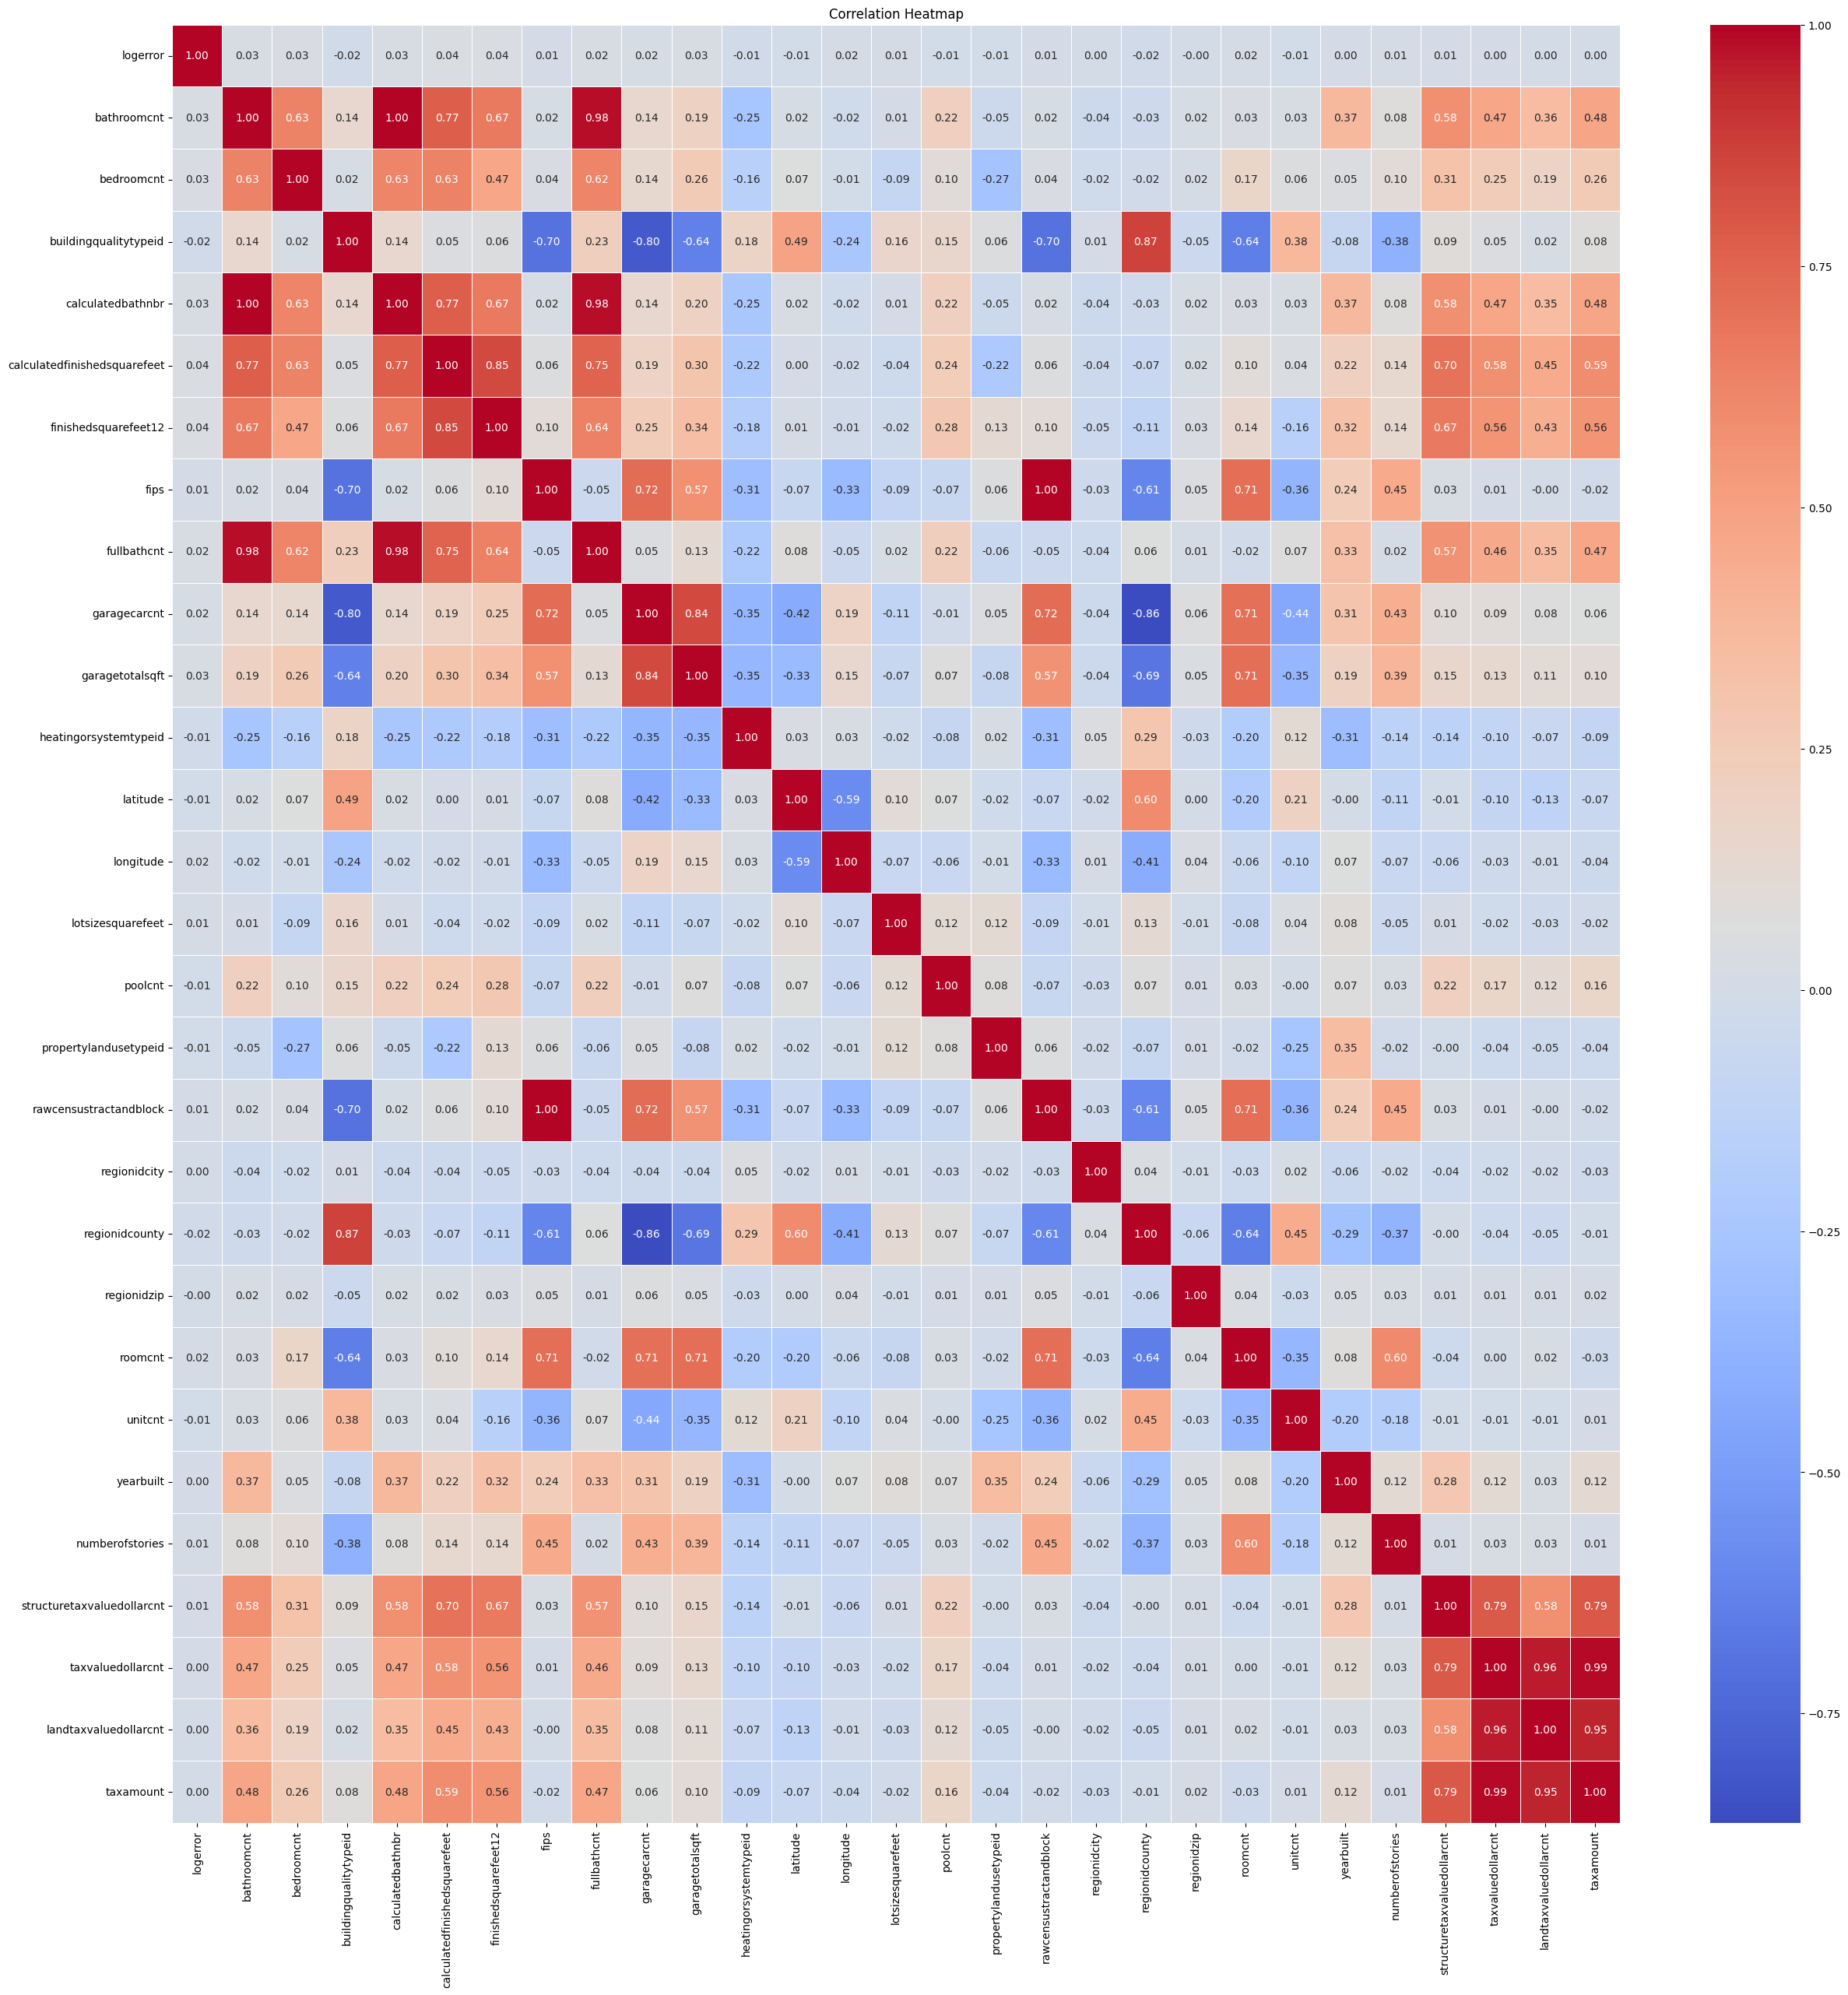

In [191]:
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [192]:
df.isnull().sum()

logerror                        0
transactiondate                 0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
garagecarcnt                    0
garagetotalsqft                 0
heatingorsystemtypeid           0
latitude                        0
longitude                       0
lotsizesquarefeet               0
poolcnt                         0
propertycountylandusecode       0
propertylandusetypeid           0
propertyzoningdesc              0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
numberofstories                 0
structuretaxvaluedollarcnt      0
taxvaluedollar

In [193]:
# Separating Datetime variables
df['transactiondate']=pd.to_datetime(df['transactiondate'])
df['month'] = df['transactiondate'].dt.month
df['year'] = df['transactiondate'].dt.year
df['month_abbr'] = df['month'].apply(lambda x: calendar.month_abbr[x])
df.drop('transactiondate', axis=1, inplace=True)

In [194]:
df.head()

,logerror,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,garagecarcnt,...,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,month,year,month_abbr
0,0.025595,3.5,4.0,0.0,3.5,3100.0,3100.0,6059.0,3.0,2.0,...,0.0,1998.0,1.0,485713.0,1023282.0,537569.0,11013.72,1,2017,Jan
1,0.055619,1.0,2.0,0.0,1.0,1465.0,1465.0,6111.0,1.0,1.0,...,0.0,1967.0,1.0,88000.0,464000.0,376000.0,5672.48,1,2017,Jan
2,0.005383,2.0,3.0,0.0,2.0,1243.0,1243.0,6059.0,2.0,2.0,...,0.0,1962.0,1.0,85289.0,564778.0,479489.0,6488.30,1,2017,Jan
3,-0.103410,3.0,4.0,8.0,3.0,2376.0,2376.0,6037.0,3.0,0.0,...,1.0,1970.0,1.0,108918.0,145143.0,36225.0,1777.51,1,2017,Jan
4,0.006940,3.0,3.0,8.0,3.0,1312.0,1312.0,6037.0,3.0,0.0,...,1.0,1964.0,1.0,73681.0,119407.0,45726.0,1533.89,1,2017,Jan


In [195]:
#check if the year column has any value other than 2017
df['year'].unique()


array([2017], dtype=int64)

In [196]:
#drop year and month_abbr column
df.drop('year', axis=1, inplace=True)
df.drop('month_abbr', axis=1, inplace=True)

In [197]:
#check for duplicates
df.duplicated().sum()

4

In [198]:
#drop duplicates    
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [199]:
#define a function for plots because it gets tedious

def plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.title('Histogram')

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title('Q-Q plot')
    plt.show()
    print(f'Skewness: {df[variable].skew()}')
    print(f'Kurtosis: {df[variable].kurt()}')


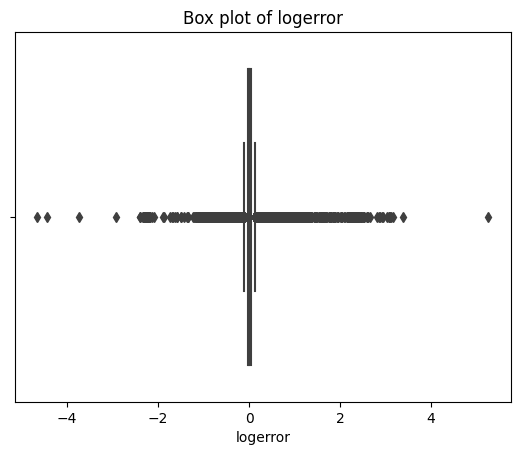

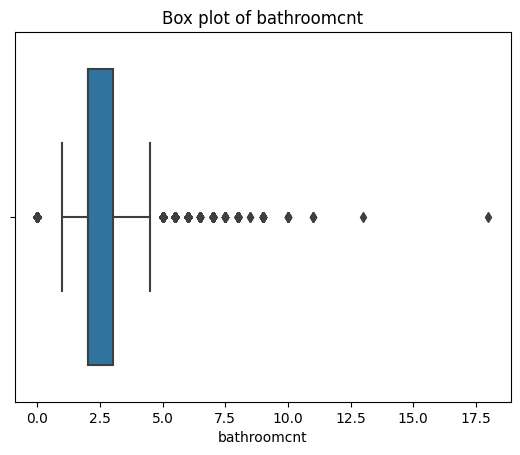

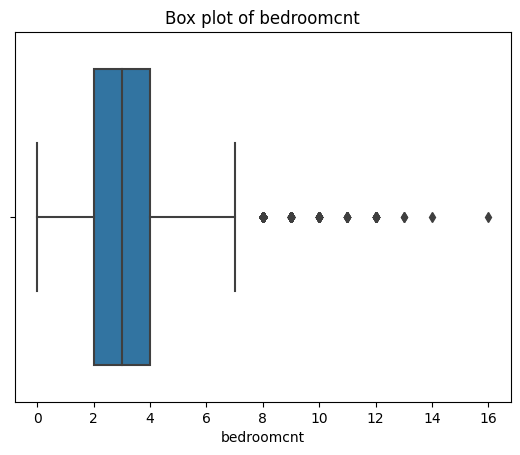

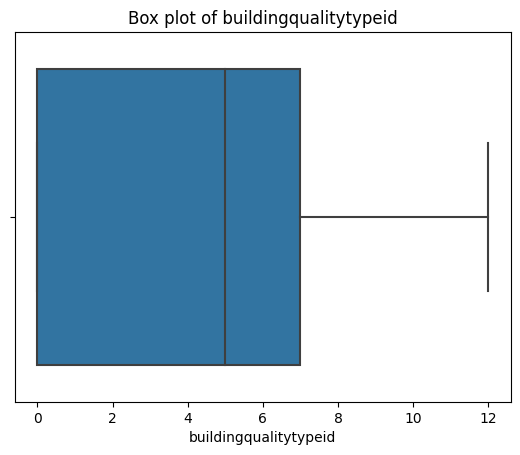

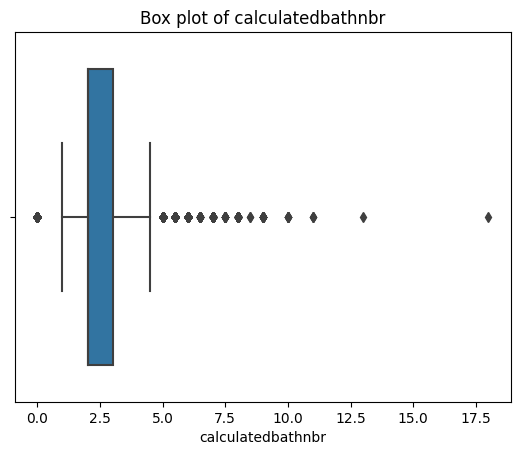

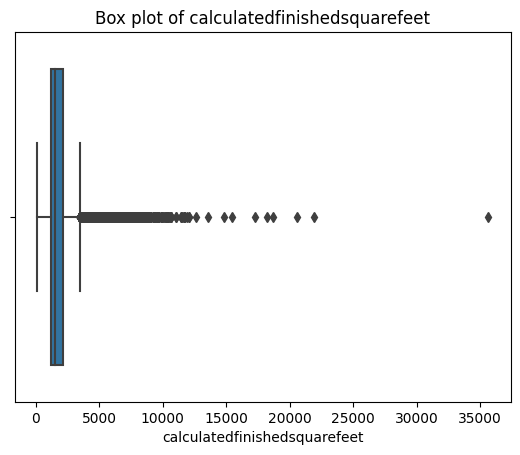

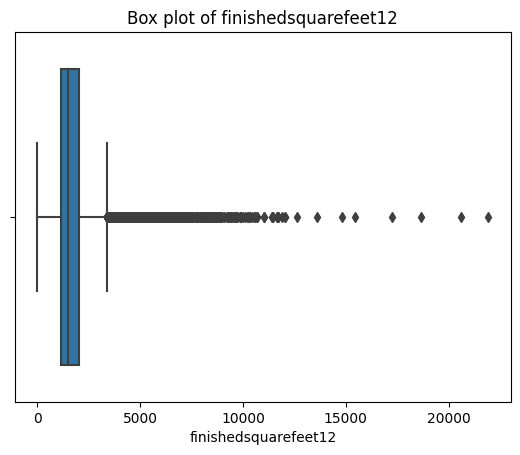

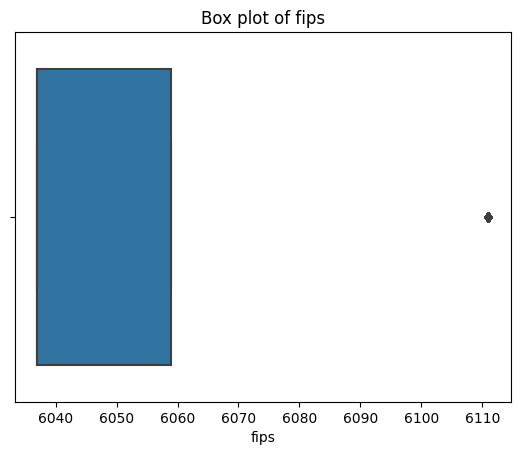

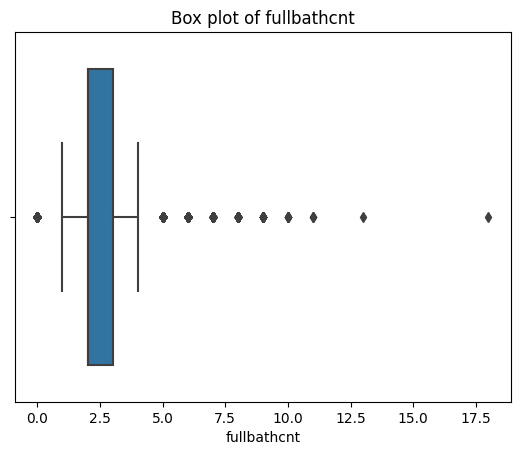

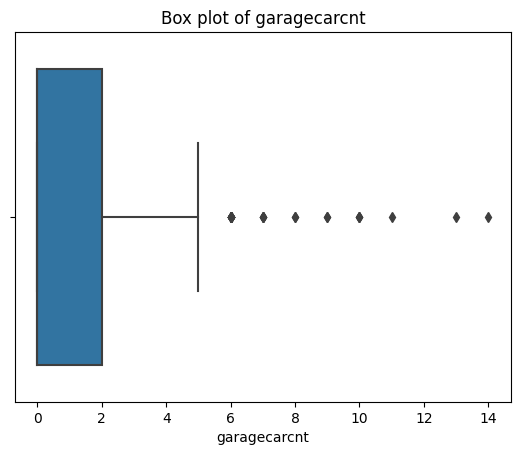

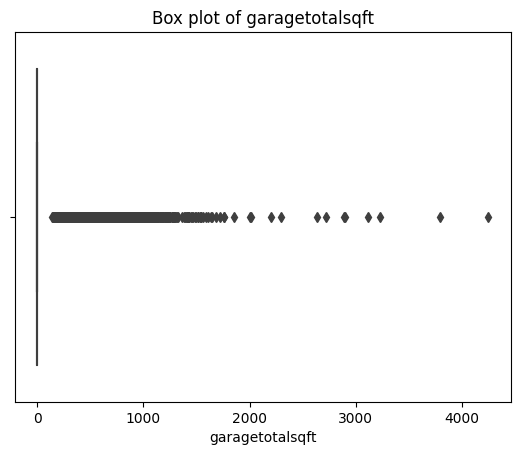

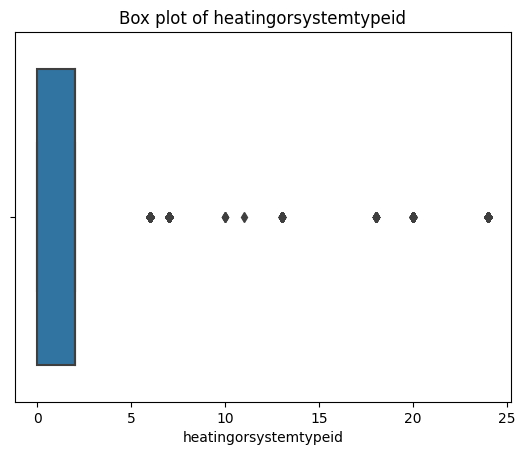

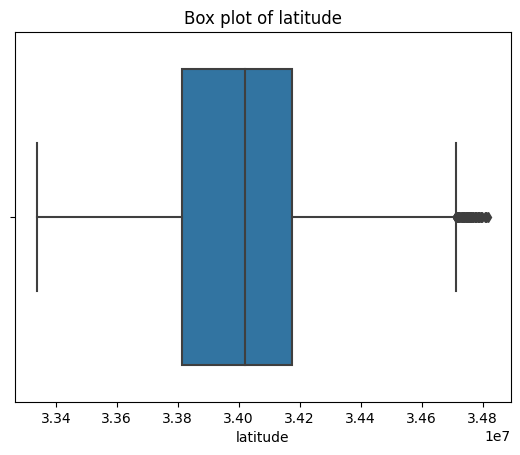

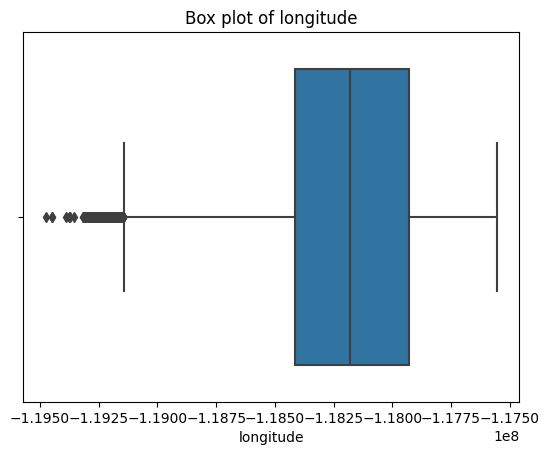

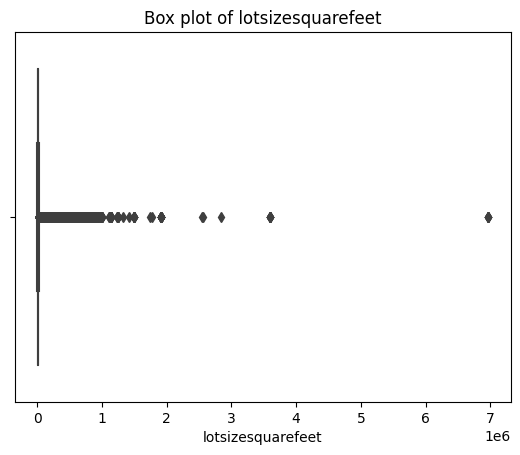

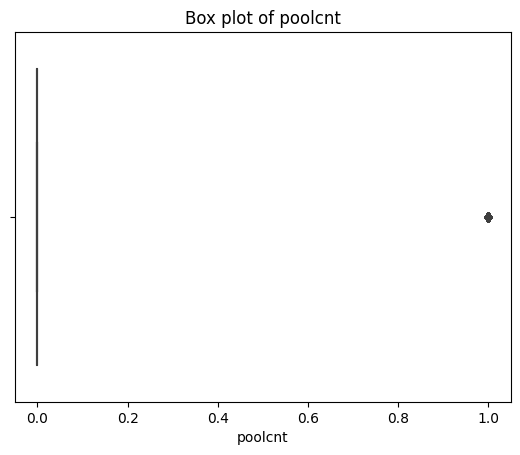

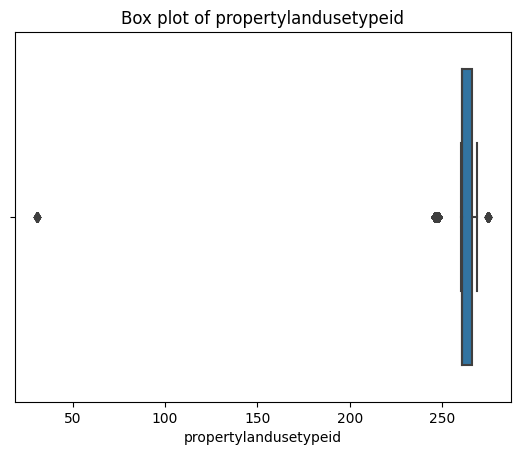

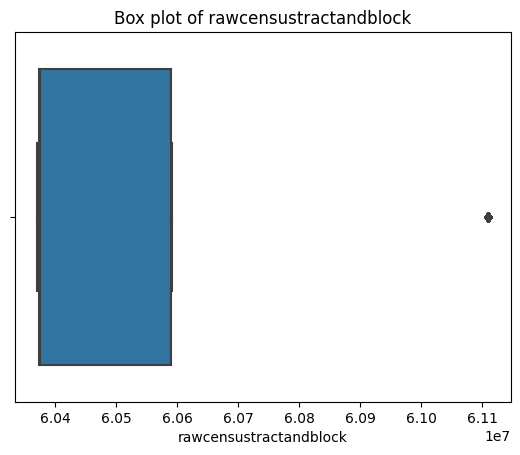

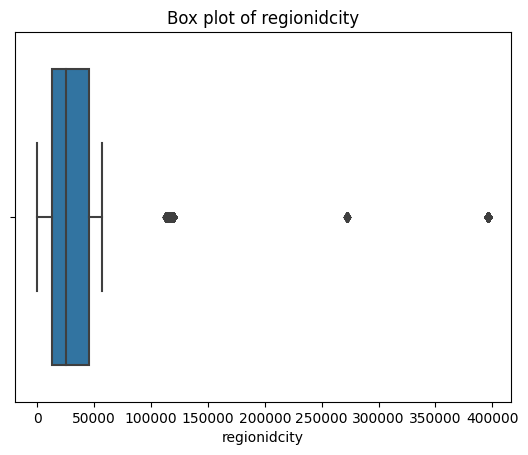

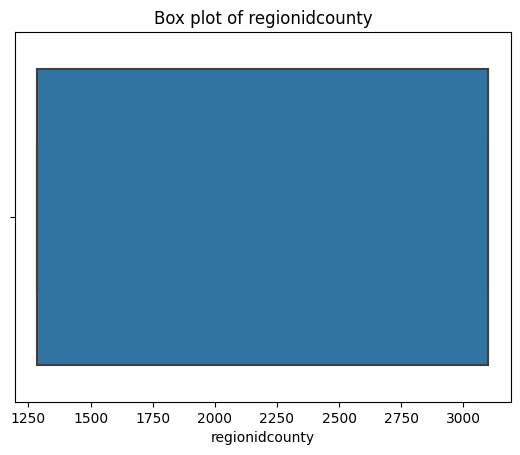

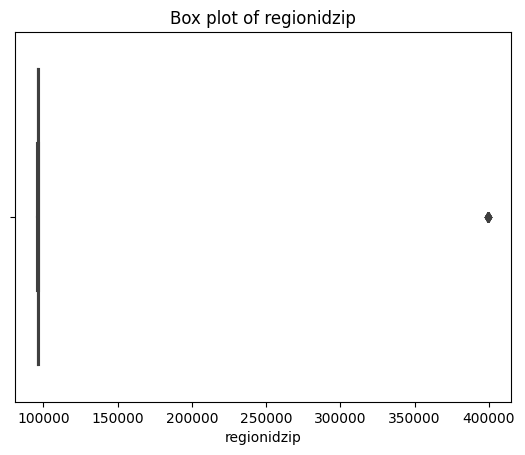

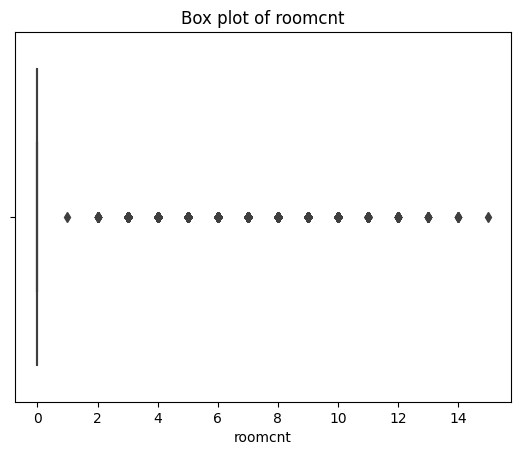

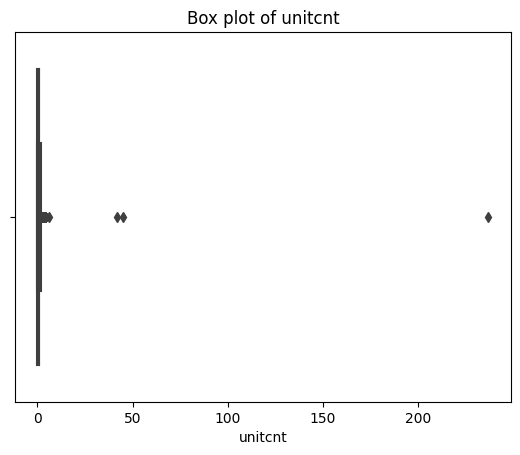

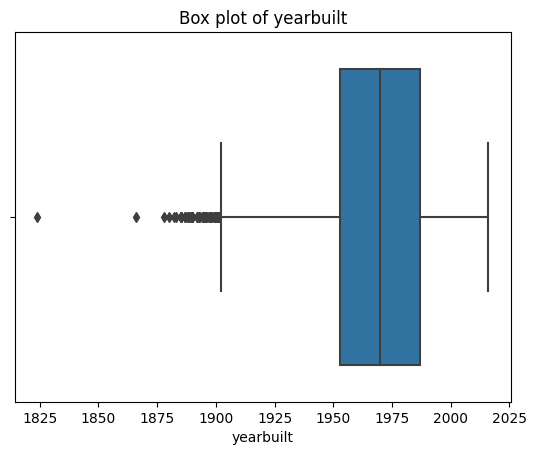

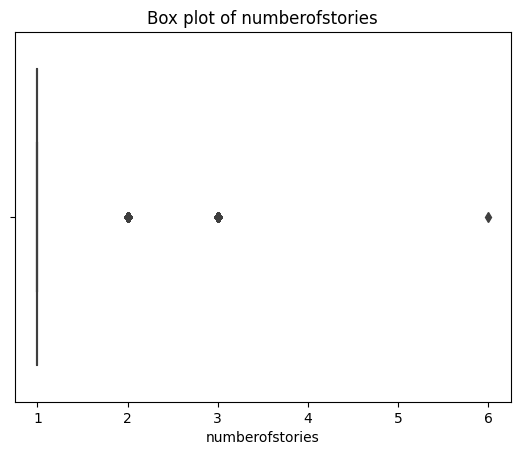

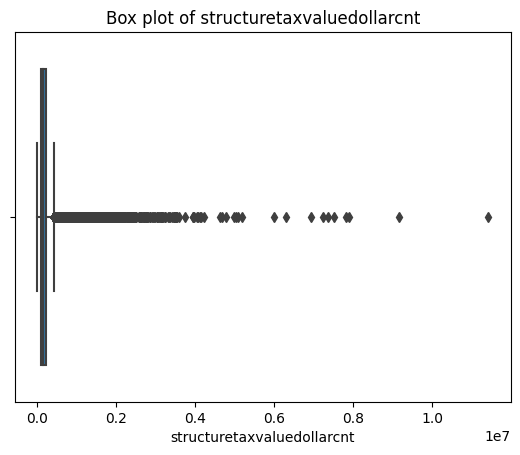

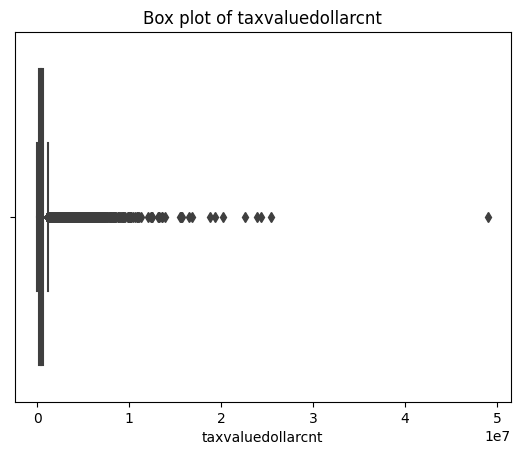

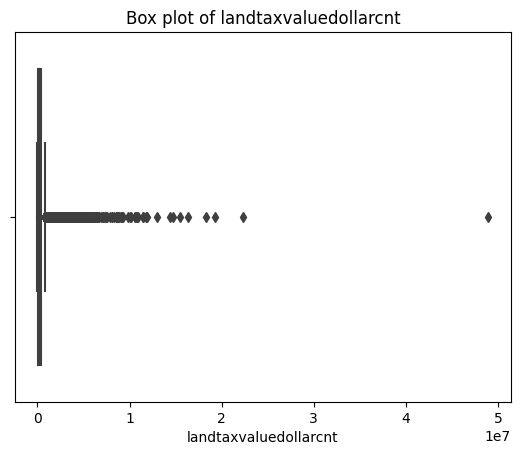

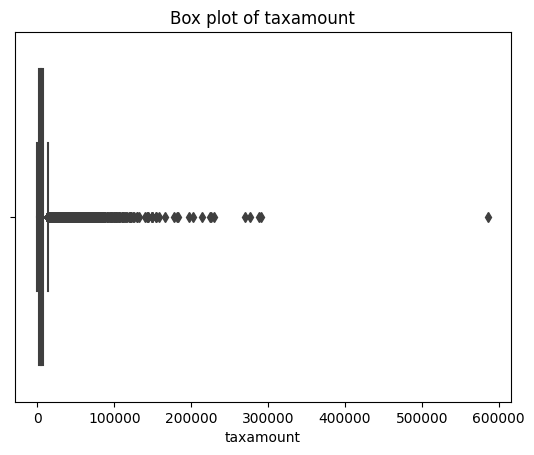

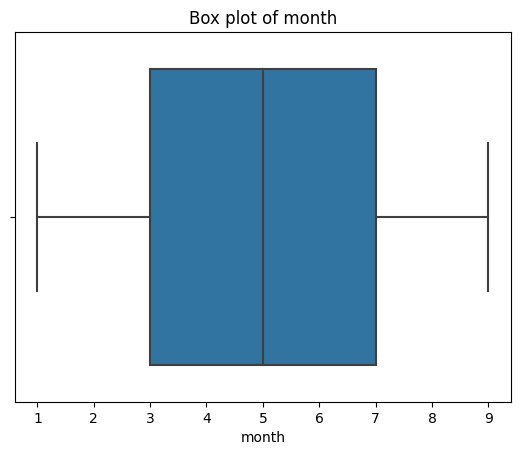

In [200]:
#boxplot
for col in df.select_dtypes(include=['number']).columns:
  sns.boxplot(x=df[col])
  plt.title(f'Box plot of {col}')
  plt.show()

In [201]:
df.head()

,logerror,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,garagecarcnt,...,regionidzip,roomcnt,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,month
0,0.025595,3.5,4.0,0.0,3.5,3100.0,3100.0,6059.0,3.0,2.0,...,96978.0,0.0,0.0,1998.0,1.0,485713.0,1023282.0,537569.0,11013.72,1
1,0.055619,1.0,2.0,0.0,1.0,1465.0,1465.0,6111.0,1.0,1.0,...,97099.0,5.0,0.0,1967.0,1.0,88000.0,464000.0,376000.0,5672.48,1
2,0.005383,2.0,3.0,0.0,2.0,1243.0,1243.0,6059.0,2.0,2.0,...,97078.0,6.0,0.0,1962.0,1.0,85289.0,564778.0,479489.0,6488.30,1
3,-0.103410,3.0,4.0,8.0,3.0,2376.0,2376.0,6037.0,3.0,0.0,...,96330.0,0.0,1.0,1970.0,1.0,108918.0,145143.0,36225.0,1777.51,1
4,0.006940,3.0,3.0,8.0,3.0,1312.0,1312.0,6037.0,3.0,0.0,...,96451.0,0.0,1.0,1964.0,1.0,73681.0,119407.0,45726.0,1533.89,1


Since we have a large number of datapoints we will ignore the outliers and hope that it doesn't affect the model performance

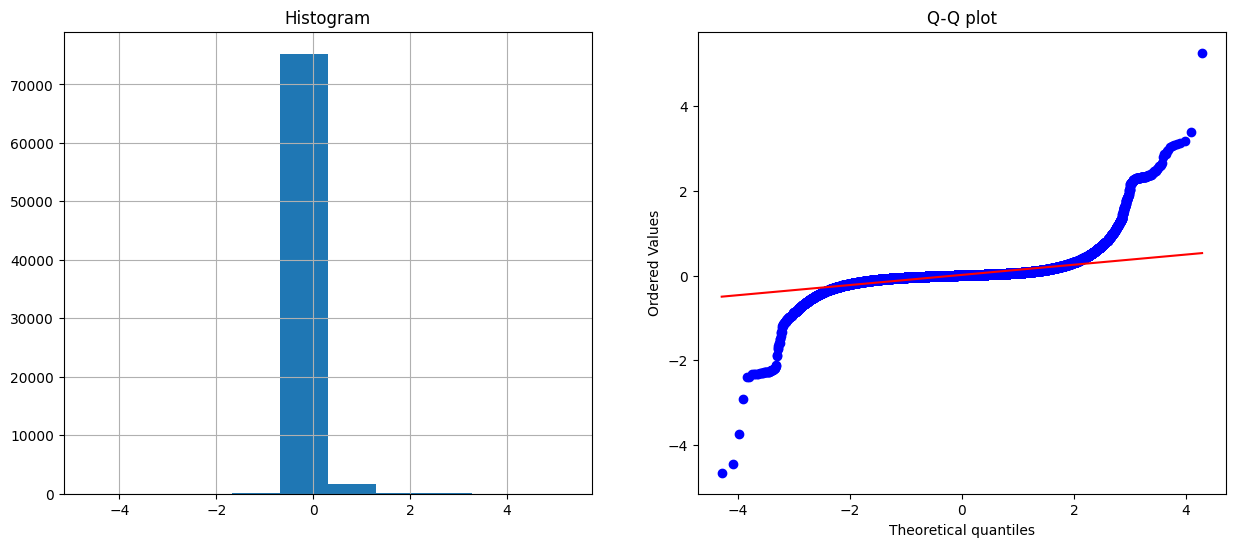

Skewness: 3.7163388484782724
Kurtosis: 113.60842004203796


In [202]:
#histogram or logerror
plots(df, 'logerror')

## Train-Test Split

In [203]:
X = df.select_dtypes(include=['float64', 'int64']).drop('logerror', axis=1)
y = df['logerror']

## Model Formulation

For this regression problem we are going to use the Polynomial Regression and evaluate its performance.

In [204]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create polynomial features
poly_features = PolynomialFeatures(degree=2)

# Transform the features into polynomial features
X_poly = poly_features.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)


## Model Evaluation

In [205]:
mse

0.038058324354155

A good Mean Square Error is the one which is closer to 0 which means that our MSE (0.038) shows us that the error in the predicted value and the actual value is very low.

In [206]:
#calculate mae
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

0.07361968888177788

In [207]:
#max and min value in logerror column
df['logerror'].max(), df['logerror'].min()

(5.2629986498, -4.65542037764)

In [208]:
#calculate rmse
rmse = np.sqrt(mse)


In [210]:
#print the values
print('Polynomial Regression Model:')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Polynomial Regression Model:
Mean Squared Error: 0.038058324354155
Mean Absolute Error: 0.07361968888177788
Root Mean Squared Error: 0.19508542834910814


## Conclusion

The MSE and RMSE are relatively low, which suggests that the model's predictions are generally close to the actual values on average. Since the RMSE is higher than the MSE, this indicates there is variance in the errors, which is expected since RMSE gives more weight to larger errors due to the squaring term.

The MAE is moderate compared to the range of logerror in the dataset (which spans from around -4.6554 to 5.2629). The MAE provides a clear measure of the average magnitude of errors without considering their direction, and a value of 0.6736 suggests that, on average, the model's predictions are within this distance from the actual logerror values.